In [1]:
begin
    using Serialization, FileIO
    using LinearAlgebra
    using Interpolations
    using Roots
    using Plots
    using Optim
    include("functions-RMT-ch18.jl");
    include("ini-setup-RMT-ch18.jl");
end;

In [2]:
begin
    saved_vals=deserialize("output-RMT-ch18-200.jls");
    A1=saved_vals[1];
    B1=saved_vals[2];
    C1=saved_vals[3];
    D1p=saved_vals[4];
    E1p=saved_vals[5];
    D1m=saved_vals[6];
    E1m=saved_vals[7];
end;

In [24]:
# (rate,expected demand)
[(A1[i],B1[i]) for i=1:length(A1)]

20-element Vector{Tuple{Float64, Float64}}:
 (0.03701851068729933, 7.3696566090458155)
 (0.03, 0.510066845946097)
 (0.02, -1.9729997109227826)
 (0.025, -1.0654201141611443)
 (0.0275, -0.505665361435287)
 (0.028749999999999998, -0.1113888746946741)
 (0.029375, 0.16311610386135325)
 (0.029062499999999998, 0.02379514486718422)
 (0.028906249999999998, -0.04304169618186463)
 (0.028984375, 0.01870022538380367)
 (0.0289453125, 0.015794907576101393)
 (0.028925781249999998, -0.04179338316455158)
 (0.028935546875, 0.01539762844520665)
 (0.0289306640625, -0.04146948169368391)
 (0.028933105468749998, -0.04131361382945803)
 (0.028934326171874997, -0.04123568976115094)
 (0.028934936523437496, -0.04119673019258489)
 (0.028935241699218746, -0.04117725102465344)
 (0.028935394287109374, 0.01538792345543593)
 (0.02893531799316406, 0.015383070922166776)

In [25]:
# convergence and lack-there-of
A1[end]-A1[end-2],B1[end]-B1[end-2]

(7.629394531416533e-8, 0.056560321946820216)

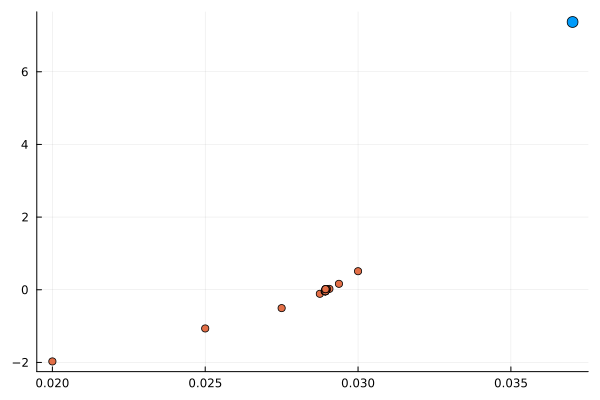

In [26]:
# the left plot in Figure 1 in [SATEA]
plot([A1[1]], [B1[1]], seriestype=:scatter, ms=6, label="")
plot!(A1[2:end], B1[2:end], seriestype=:scatter, label="")

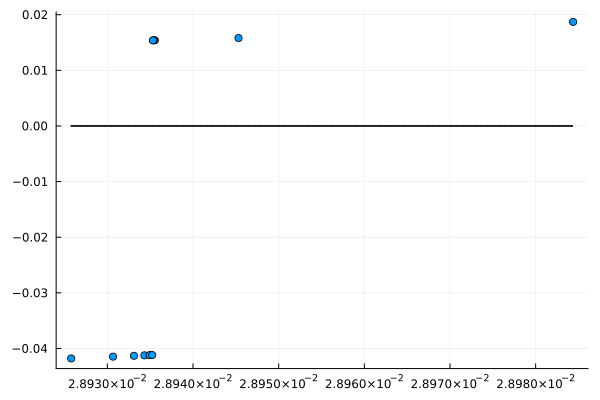

In [27]:
# the right plot in Figure 1 in [SATEA]
begin
    lvl=collect(minimum(A1[10:end]):0.0000001:maximum(A1[10:end]));
    lvl0=[0.0 for x in lvl];
    plot(A1[10:end],B1[10:end],seriestype=:scatter, label="")
    plot!(lvl,lvl0, seriestype=:scatter, ms=0.5, label="")
end


In [15]:
## experiment with 2K grid points
begin
    saved_vals=deserialize("output-RMT-ch18-2K.jls");
    A2=saved_vals[1];
    B2=saved_vals[2];
    C2=saved_vals[3];
    D2p=saved_vals[4];
    E2p=saved_vals[5];
    D2m=saved_vals[6];
    E2m=saved_vals[7];
end;

In [28]:
# (rate,expected demand)
[(A2[i],B2[i]) for i=1:length(A1)]

20-element Vector{Tuple{Float64, Float64}}:
 (0.03701851068729933, 6.901030700349697)
 (0.03, 4.752922406432852)
 (0.02, -2.3760213752509043)
 (0.025, -1.660077615449614)
 (0.0275, 1.9612350672273267)
 (0.026250000000000002, -1.4970516328079035)
 (0.026875000000000003, -1.4244100661711903)
 (0.027187500000000003, -1.384199047345656)
 (0.02734375, -1.3647950282856893)
 (0.027421875, -1.3540333498512596)
 (0.027460937499999998, 1.9123408467470753)
 (0.027441406249999998, 1.9052187085592882)
 (0.027431640624999996, 1.9014587979701378)
 (0.027426757812499997, 1.8995352213298011)
 (0.027424316406249996, 1.8985398756228542)
 (0.027423095703124997, -1.353910586114863)
 (0.027423706054687497, 1.898344736653897)
 (0.027423400878906247, 1.898108915981646)
 (0.027423248291015622, 1.8980739113636893)
 (0.02742317199707031, -1.3539040644306715)

In [29]:
# convergence and lack-there-of
A2[end]-A2[end-2],B2[end]-B2[end-2]

(-2.288818359355571e-7, -3.2520129804123172)

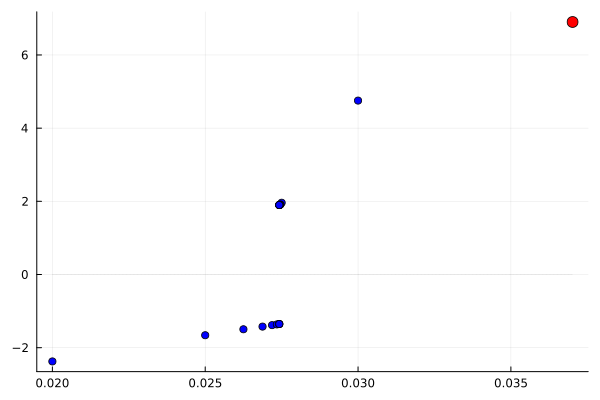

In [39]:
# the left plot in Figure 2 in [SATEA]
begin
    lvl=collect(minimum(A2):0.00001:maximum(A2));
    lvl0=[0.0 for x in lvl];
    plot([A2[1]], [B2[1]], seriestype=:scatter, ms=6, mc=:red, label="")
    plot!(A2[2:end], B2[2:end], seriestype=:scatter, mc=:blue, label="")
    plot!(lvl,lvl0, seriestype=:scatter, ms=0.1, mc=:black, label="")
end


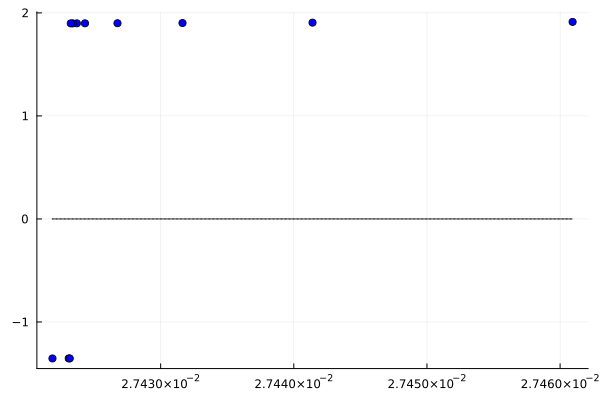

In [40]:
# the right plot in Figure 2 in [SATEA]
begin
    lvl=(minimum(A2[10:end]):0.0000001:maximum(A2[10:end]));
    lvl0=[0.0 for x in lvl];
    plot(A2[10:end],B2[10:end],seriestype=:scatter, mc=:blue, label="")
    plot!(lvl,lvl0,seriestype=:scatter, ms=0.75, mc=:black, label="")
end
